In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 載入資料與資料清理

In [2]:
nba_df = pd.DataFrame([])
for year in range(2021,2022):
    nba_df = pd.concat([nba_df,pd.read_csv(f"NBA_DATA3-5/{year}_TeamGameStatsAndOdds.csv")],ignore_index=True)
print(nba_df.shape)
nba_df

(1674, 138)


,gmDate,gmTime,seasType,offLNm1,offFNm1,offLNm2,offFNm2,OffLNm3,offFNm3,teamAbbr,...,away1x2LastRTP,home1x2KellyIndex,away1x2KellyIndex,OverFirstOptionRate,UnderFirstOptionRate,OverUnderFirstSpecialBetValue,OverLastOptionRate,UnderLastOptionRate,OverUnderLastSpecialBetValue,SourceUrl
0,2021/10/19,19:30,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn Nets,...,95.85,0.95,0.96,0.90,0.90,240.5,0.86,0.86,233.5,http://nba.win007.com/1x2/oddslist/429690.htm
1,2021/10/19,19:30,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Milwaukee Bucks,...,95.85,0.95,0.96,0.90,0.90,240.5,0.86,0.86,233.5,http://nba.win007.com/1x2/oddslist/429690.htm
2,2021/10/19,22:00,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Golden State Warriors,...,96.71,0.96,0.98,0.90,0.90,230.5,1.00,0.76,230.5,http://nba.win007.com/1x2/oddslist/429689.htm
3,2021/10/19,22:00,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles Lakers,...,96.71,0.96,0.98,0.90,0.90,230.5,1.00,0.76,230.5,http://nba.win007.com/1x2/oddslist/429689.htm
4,2021/10/20,19:00,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Indiana Pacers,...,95.84,0.96,0.95,0.90,0.90,228.5,0.83,0.90,242.5,http://nba.win007.com/1x2/oddslist/429870.htm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2022/02/12,21:00,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Phoenix Suns,...,97.39,0.96,1.08,0.91,0.91,225.5,0.95,0.80,234.5,http://nba.win007.com/1x2/oddslist/431894.htm
1670,2022/02/13,14:00,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Atlanta Hawks,...,95.60,0.96,0.95,0.91,0.91,220.5,0.95,0.80,204.5,http://nba.win007.com/1x2/oddslist/431895.htm
1671,2022/02/13,14:00,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Boston Celtics,...,95.60,0.96,0.95,0.91,0.91,220.5,0.95,0.80,204.5,http://nba.win007.com/1x2/oddslist/431895.htm
1672,2022/02/13,15:00,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Minnesota Timberwolves,...,95.61,0.95,0.96,0.91,0.91,236.5,0.80,0.95,255.5,http://nba.win007.com/1x2/oddslist/431896.htm


In [3]:
# 刪除資料欄
cols_with_missing = ['offLNm1','offFNm1','offLNm2','offFNm2','OffLNm3','offFNm3',

                     'teamConf','teamDayOff','team2PA','team2PM','team2P_Percentage','teamPTS1','teamPTS2','teamPTS3','teamPTS4','teamPTS5','teamPTS6','teamPTS7','teamPTS8','teamBLKR',
                     'teamPPS','teamFIC','teamFIC40','teamEDiff','teamPlay_Percentage','teamAR',

                     'opptConf','opptDayOff','oppt2PA','oppt2PM','oppt2P_Percentage','opptPTS1','opptPTS2','opptPTS3','opptPTS4','opptPTS5','opptPTS6','opptPTS7','opptPTS8','opptBLKR',
                     'opptPPS','opptFIC','opptFIC40','opptEDiff','opptPlay_Percentage','opptAR']

nba_df.drop(cols_with_missing, axis=1, inplace=True)
nba_df

,gmDate,gmTime,seasType,teamAbbr,teamLoc,teamRslt,teamMin,teamPTS,teamAST,teamTO,...,away1x2LastRTP,home1x2KellyIndex,away1x2KellyIndex,OverFirstOptionRate,UnderFirstOptionRate,OverUnderFirstSpecialBetValue,OverLastOptionRate,UnderLastOptionRate,OverUnderLastSpecialBetValue,SourceUrl
0,2021/10/19,19:30,Regular,Brooklyn Nets,Away,Loss,240,104,19,12,...,95.85,0.95,0.96,0.90,0.90,240.5,0.86,0.86,233.5,http://nba.win007.com/1x2/oddslist/429690.htm
1,2021/10/19,19:30,Regular,Milwaukee Bucks,Home,Win,240,127,25,7,...,95.85,0.95,0.96,0.90,0.90,240.5,0.86,0.86,233.5,http://nba.win007.com/1x2/oddslist/429690.htm
2,2021/10/19,22:00,Regular,Golden State Warriors,Away,Win,240,121,30,17,...,96.71,0.96,0.98,0.90,0.90,230.5,1.00,0.76,230.5,http://nba.win007.com/1x2/oddslist/429689.htm
3,2021/10/19,22:00,Regular,Los Angeles Lakers,Home,Loss,240,114,21,17,...,96.71,0.96,0.98,0.90,0.90,230.5,1.00,0.76,230.5,http://nba.win007.com/1x2/oddslist/429689.htm
4,2021/10/20,19:00,Regular,Indiana Pacers,Away,Loss,240,122,29,16,...,95.84,0.96,0.95,0.90,0.90,228.5,0.83,0.90,242.5,http://nba.win007.com/1x2/oddslist/429870.htm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2022/02/12,21:00,Regular,Phoenix Suns,Home,Win,240,132,40,7,...,97.39,0.96,1.08,0.91,0.91,225.5,0.95,0.80,234.5,http://nba.win007.com/1x2/oddslist/431894.htm
1670,2022/02/13,14:00,Regular,Atlanta Hawks,Away,Loss,240,95,18,13,...,95.60,0.96,0.95,0.91,0.91,220.5,0.95,0.80,204.5,http://nba.win007.com/1x2/oddslist/431895.htm
1671,2022/02/13,14:00,Regular,Boston Celtics,Home,Win,240,105,21,12,...,95.60,0.96,0.95,0.91,0.91,220.5,0.95,0.80,204.5,http://nba.win007.com/1x2/oddslist/431895.htm
1672,2022/02/13,15:00,Regular,Minnesota Timberwolves,Away,Win,240,129,23,13,...,95.61,0.95,0.96,0.91,0.91,236.5,0.80,0.95,255.5,http://nba.win007.com/1x2/oddslist/431896.htm


In [4]:
# 刪除不相關的資料
cols_with_irrelevant = ['seasType','teamMin','opptLoc','opptRslt','opptMin',
                        'OverFirstOptionRate','UnderFirstOptionRate','OverUnderFirstSpecialBetValue','OverLastOptionRate','UnderLastOptionRate','OverUnderLastSpecialBetValue','SourceUrl']
nba_df.drop(cols_with_irrelevant, axis=1, inplace=True)

In [5]:
# 離散資料轉連續數值
nba_df['teamLoc'] = nba_df['teamLoc'].replace(['Home', 'Away'], [1,0]).astype(str).astype(int)
nba_df['teamRslt'] = nba_df['teamRslt'].replace(['Win', 'Loss'], [1,0]).astype(str).astype(int)

In [6]:
#因為一場比賽被劃分成兩筆，所以只取前面為主場那筆
nba_df = nba_df[nba_df.teamLoc == 1].reset_index()
del nba_df['index']
del nba_df['teamLoc']

In [7]:
# 更改欄位名稱
nba_df.columns = nba_df.columns.str.replace('team', 'home')
nba_df.columns = nba_df.columns.str.replace('oppt', 'away')
nba_df.columns = nba_df.columns.str.replace('home1x2FirstRTP', '1x2FirstRTP')
nba_df.columns = nba_df.columns.str.replace('away1x2LastRTP', '1x2LastRTP')

In [8]:
# 補值
def Complement(values):
    FirstValue = values[0]
    FinalValue = values[1]
    if pd.isnull(FinalValue) :
        return FirstValue
    else:
        return FinalValue

nba_df['home1x2LastOptionRate'] = nba_df[['home1x2FirstOptionRate','home1x2LastOptionRate']].apply(Complement,axis=1)
nba_df['away1x2LastOptionRate'] = nba_df[['away1x2FirstOptionRate','away1x2LastOptionRate']].apply(Complement,axis=1)
nba_df['home1x2LastWinRate'] = nba_df[['home1x2FirstWinRate','home1x2LastWinRate']].apply(Complement,axis=1)
nba_df['away1x2LastWinRate'] = nba_df[['away1x2FirstWinRate','away1x2LastWinRate']].apply(Complement,axis=1)
nba_df['1x2LastRTP'] = nba_df[['1x2FirstRTP','1x2LastRTP']].apply(Complement,axis=1)

In [9]:
# 刪除空資料列(沒有賠率的)
delete_indexs = nba_df[nba_df.away1x2FirstOptionRate.isnull()].index
nba_df = nba_df.drop(delete_indexs,axis = 0).reset_index(drop=True)
nba_df

,gmDate,gmTime,homeAbbr,homeRslt,homePTS,homeAST,homeTO,homeSTL,homeBLK,homeFGA,...,home1x2LastOptionRate,away1x2LastOptionRate,home1x2FirstWinRate,away1x2FirstWinRate,home1x2LastWinRate,away1x2LastWinRate,1x2FirstRTP,1x2LastRTP,home1x2KellyIndex,away1x2KellyIndex
0,2021/10/19,19:30,Milwaukee Bucks,1,127,25,7,8,9,105,...,1.80,2.05,50.00,50.00,53.25,46.75,95.00,95.85,0.95,0.96
1,2021/10/19,22:00,Los Angeles Lakers,0,114,21,17,7,4,95,...,1.62,2.40,65.17,34.83,59.70,40.30,95.80,96.71,0.96,0.98
2,2021/10/20,19:00,Charlotte Hornets,1,123,29,8,9,5,107,...,2.05,1.80,55.27,44.73,46.75,53.25,96.17,95.84,0.96,0.95
3,2021/10/20,19:00,Detroit Pistons,0,88,17,16,7,5,90,...,2.80,1.45,42.75,57.25,34.12,65.88,96.19,95.54,0.98,0.94
4,2021/10/20,19:30,New York Knicks,1,138,27,17,9,10,105,...,1.68,2.25,52.22,47.78,57.25,42.75,95.56,96.18,0.94,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2022/02/11,20:00,Chicago Bulls,1,134,32,13,6,3,87,...,1.87,1.95,62.50,37.50,51.05,48.95,97.50,95.46,0.97,0.94
820,2022/02/11,21:00,Utah Jazz,1,114,22,15,15,5,89,...,1.11,7.00,86.31,13.69,86.31,13.69,95.80,95.80,0.94,1.05
821,2022/02/12,21:00,Phoenix Suns,1,132,40,7,8,2,105,...,1.06,12.00,91.21,8.79,91.88,8.12,96.68,97.39,0.96,1.08
822,2022/02/13,14:00,Boston Celtics,1,105,21,12,5,6,85,...,1.33,3.40,67.87,32.13,71.88,28.12,96.38,95.60,0.96,0.95


In [10]:
nba_df.describe()

,homeRslt,homePTS,homeAST,homeTO,homeSTL,homeBLK,homeFGA,homeFGM,homeFG_Percentage,home3PA,...,home1x2LastOptionRate,away1x2LastOptionRate,home1x2FirstWinRate,away1x2FirstWinRate,home1x2LastWinRate,away1x2LastWinRate,1x2FirstRTP,1x2LastRTP,home1x2KellyIndex,away1x2KellyIndex
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,...,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.00000,824.000000,824.000000
mean,0.550971,109.811893,24.639563,13.048544,7.725728,5.012136,88.225728,40.506068,0.459961,35.625000,...,1.953216,2.860328,57.015910,42.984090,56.971735,43.028265,96.050121,96.06790,0.961129,0.965777
std,0.497697,12.184978,4.987463,3.728980,2.824131,2.438024,6.818959,5.167894,0.054132,6.553743,...,0.962772,1.755526,18.021571,18.021571,18.388331,18.388331,0.512920,0.51981,0.032127,0.043603
min,0.000000,77.000000,11.000000,4.000000,0.000000,0.000000,68.000000,26.000000,0.309000,18.000000,...,1.050000,1.070000,11.990000,8.050000,10.120000,7.890000,95.000000,95.00000,0.670000,0.670000
25%,0.000000,102.000000,21.000000,10.000000,6.000000,3.000000,83.000000,37.000000,0.420000,31.000000,...,1.330000,1.680000,42.750000,28.570000,42.750000,28.120000,95.760000,95.76000,0.950000,0.950000
50%,1.000000,110.000000,24.000000,13.000000,8.000000,5.000000,88.000000,40.000000,0.460500,35.000000,...,1.660000,2.300000,57.250000,42.750000,58.080000,41.920000,95.860000,95.93000,0.960000,0.960000
75%,1.000000,118.000000,28.000000,15.250000,9.000000,7.000000,93.000000,44.000000,0.500000,40.000000,...,2.250000,3.400000,71.430000,57.250000,71.880000,57.250000,96.380000,96.41000,0.970000,0.980000
max,1.000000,152.000000,41.000000,25.000000,21.000000,13.000000,111.000000,60.000000,0.653000,55.000000,...,9.500000,12.250000,91.950000,88.010000,92.110000,89.880000,97.500000,97.40000,1.250000,1.420000


# 特徵工程

In [11]:
# Player efficiency rating 績效指數評級 (PIR) 是一個總體績效指標。

homePIR = ((nba_df['homePTS'] + nba_df['homeTRB'] + nba_df['homeAST']
            + nba_df['homeSTL'] + nba_df['homeBLK'] + nba_df['awayFouls'])
           # Missed Field Goals:
           - ((nba_df['homeFGA']- nba_df['homeFGM'])
              # Missed Free Throws:
              +(nba_df['homeFTA'] - nba_df['homeFTM'])
              + nba_df['homeTO'] + nba_df['awayBLK'] + nba_df['homeFouls']))

awayPIR = ((nba_df['awayPTS'] + nba_df['awayTRB'] + nba_df['awayAST']
            + nba_df['awaySTL'] + nba_df['awayBLK'] + nba_df['homeFouls'])
           # Missed Field Goals:
           - ((nba_df['awayFGA']- nba_df['awayFGM'])
              # Missed Free Throws:
              +(nba_df['awayFTA'] - nba_df['awayFTM'])
              + nba_df['awayTO'] + nba_df['homeBLK'] + nba_df['awayFouls']))

nba_df['homePIR'] = pd.Series(homePIR)
nba_df['awayPIR'] = pd.Series(awayPIR)

In [12]:
# 新增其他特徵
homePPS = nba_df.homePTS/nba_df.homeFGA
homeFIC = nba_df.homePTS + nba_df.homeORB + 0.75 * nba_df.homeDRB+ nba_df.homeAST + nba_df.homeSTL + nba_df.homeBLK - 0.75 * nba_df.homeFGA - 0.375 * nba_df.homeFTA - nba_df.homeTO - 0.5 * nba_df.homeFouls
homeEDiff = nba_df.homeOrtg-nba_df.homeDrtg
homePlay_Percentage = nba_df.homeFGM / (nba_df.homeFGA - nba_df.homeORB + nba_df.homeTO)
homeAR = (nba_df.homeAST * 100) / (nba_df.homeFGA - 0.44 * nba_df.homeFTA + nba_df.homeAST + nba_df.homeTO)

awayPPS = nba_df.awayPTS/nba_df.awayFGA
awayFIC = nba_df.awayPTS + nba_df.awayORB + 0.75 * nba_df.awayDRB+ nba_df.awayAST + nba_df.awaySTL + nba_df.awayBLK - 0.75 * nba_df.awayFGA - 0.375 * nba_df.awayFTA - nba_df.awayTO - 0.5 * nba_df.awayFouls
awayEDiff = nba_df.awayOrtg-nba_df.awayDrtg
awayPlay_Percentage = nba_df.awayFGM / (nba_df.awayFGA - nba_df.awayORB + nba_df.awayTO)
awayAR = (nba_df.awayAST * 100) / (nba_df.awayFGA - 0.44 * nba_df.awayFTA + nba_df.awayAST + nba_df.awayTO)

nba_df['homePPS'] = pd.Series(homePPS)
nba_df['homeFIC'] = pd.Series(homeFIC)
nba_df['homeEDiff'] = pd.Series(homeEDiff)
nba_df['homePlay_Percentage'] = pd.Series(homePlay_Percentage)
nba_df['homeAR'] = pd.Series(homeAR)

nba_df['awayPPS'] = pd.Series(awayPPS)
nba_df['awayFIC'] = pd.Series(awayFIC)
nba_df['awayEDiff'] = pd.Series(awayEDiff)
nba_df['awayPlay_Percentage'] = pd.Series(awayPlay_Percentage)
nba_df['awayAR'] = pd.Series(awayAR)

In [13]:
# 判斷是否為明星賽前後

nba_df['gmDate'] = pd.to_datetime(nba_df['gmDate'], errors='coerce')
nba_df['year'] = nba_df['gmDate'].dt.year
nba_df['month'] = nba_df['gmDate'].dt.month

def seasons(d):
    y=d[0]
    m=d[1]

    if (y ==2014 and m in (10,11,12)) or (y==2015 and m in (1,2,3,4)):
        s=1
    elif (y==2015 and m in (10,11,12)) or (y==2016 and m in (1,2,3,4)):
        s=2
    elif (y==2016 and m in (10,11,12)) or (y==2017 and m in (1,2,3,4)):
        s=3
    elif (y==2017 and m in (10,11,12)) or (y==2018 and m in (1,2,3,4)):
        s=4
    elif (y==2018 and m in (10,11,12)) or (y==2019 and m in (1,2,3,4)):
        s=5
    elif (y==2019 and m in (10,11,12)) or (y==2020 and m in (1,2,3,4)):
        s=6
    elif (y==2020 and m in (10,11,12)) or (y==2021 and m in (1,2,3,4)):
        s=7
    else:
        s=8
    return s

nba_df['Season'] = nba_df[['year','month']].apply(seasons,axis=1)

In [14]:
def halfs(x):
    if x in (10,11,12,1):
        x = 'Pre_AllStar'
    else:
        x = 'Post_AllStar'
    return (x)

nba_df['Season_half']=nba_df['month'].apply(halfs)

In [15]:
# 總得分差
nba_df['homeDiffPTS']=nba_df['homePTS']-nba_df['awayPTS']
nba_df['awayDiffPTS']=nba_df['awayPTS']-nba_df['homePTS']
nba_df['absDiffPTS']=abs(nba_df['homePTS']-nba_df['awayPTS'])
nba_df

,gmDate,gmTime,homeAbbr,homeRslt,homePTS,homeAST,homeTO,homeSTL,homeBLK,homeFGA,...,awayEDiff,awayPlay_Percentage,awayAR,year,month,Season,Season_half,homeDiffPTS,awayDiffPTS,absDiffPTS
0,2021-10-19,19:30,Milwaukee Bucks,1,127,25,7,8,9,105,...,-22.6,0.406593,18.115942,2021,10,8,Pre_AllStar,23,-23,23
1,2021-10-19,22:00,Los Angeles Lakers,0,114,21,17,7,4,95,...,6.2,0.405941,23.659306,2021,10,8,Pre_AllStar,-7,7,7
2,2021-10-20,19:00,Charlotte Hornets,1,123,29,8,9,5,107,...,-1.0,0.428571,23.304404,2021,10,8,Pre_AllStar,1,-1,1
3,2021-10-20,19:00,Detroit Pistons,0,88,17,16,7,5,90,...,6.1,0.393617,15.734266,2021,10,8,Pre_AllStar,-6,6,6
4,2021-10-20,19:30,New York Knicks,1,138,27,17,9,10,105,...,-3.2,0.400000,21.399799,2021,10,8,Pre_AllStar,4,-4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2022-02-11,20:00,Chicago Bulls,1,134,32,13,6,3,87,...,-11.9,0.489796,24.622961,2022,2,8,Post_AllStar,12,-12,12
820,2022-02-11,21:00,Utah Jazz,1,114,22,15,15,5,89,...,-15.1,0.397849,19.498135,2022,2,8,Post_AllStar,15,-15,15
821,2022-02-12,21:00,Phoenix Suns,1,132,40,7,8,2,105,...,-25.2,0.381443,21.656272,2022,2,8,Post_AllStar,27,-27,27
822,2022-02-13,14:00,Boston Celtics,1,105,21,12,5,6,85,...,-10.3,0.357895,15.332198,2022,2,8,Post_AllStar,10,-10,10


In [16]:
# 紀錄主客隊場次
team_games = {}
for index, row in nba_df[['homeAbbr','Season']].groupby(['homeAbbr','Season']).size().reset_index().sort_values(by=['homeAbbr','Season'])[:].iterrows():
    team_games[f"{row['homeAbbr']},{row['Season']}"] = 1
home_games = []
away_games = []
for index, row in nba_df.iterrows():

    home_games.append(team_games[f"{row['homeAbbr']},{row['Season']}"])
    team_games[f"{row['homeAbbr']},{row['Season']}"] = team_games[f"{row['homeAbbr']},{row['Season']}"]+1

    away_games.append(team_games[f"{row['awayAbbr']},{row['Season']}"])
    team_games[f"{row['awayAbbr']},{row['Season']}"] = team_games[f"{row['awayAbbr']},{row['Season']}"]+1

nba_df['home_games'] = pd.Series(home_games)
nba_df['away_games'] = pd.Series(away_games)
nba_df[(nba_df.homeAbbr=='New York Knicks')|(nba_df.awayAbbr=='New York Knicks')][['gmDate','homeAbbr','home_games','awayAbbr','away_games']]

,gmDate,homeAbbr,home_games,awayAbbr,away_games
4,2021-10-20,New York Knicks,1,Boston Celtics,1
16,2021-10-22,Orlando Magic,2,New York Knicks,2
36,2021-10-24,New York Knicks,3,Orlando Magic,3
49,2021-10-26,New York Knicks,4,Philadelphia 76ers,4
67,2021-10-28,Chicago Bulls,5,New York Knicks,5
79,2021-10-30,New Orleans Pelicans,7,New York Knicks,6
98,2021-11-01,New York Knicks,7,Toronto Raptors,8
108,2021-11-03,Indiana Pacers,9,New York Knicks,8
126,2021-11-05,Milwaukee Bucks,9,New York Knicks,9
139,2021-11-07,New York Knicks,10,Cleveland Cavaliers,11


In [17]:
#DF for ML:
nba_df_for_ML = nba_df[['homeRslt','gmDate','gmTime',
                        'homeAbbr','home_games','home1x2FirstOptionRate','home1x2LastOptionRate','home1x2FirstWinRate','home1x2LastWinRate','home1x2KellyIndex',
                        'awayAbbr','away_games','away1x2FirstOptionRate','away1x2LastOptionRate','away1x2FirstWinRate','away1x2LastWinRate','away1x2KellyIndex',
                        'Season_half','1x2FirstRTP', '1x2LastRTP']].copy()
nba_df_for_ML

,homeRslt,gmDate,gmTime,homeAbbr,home_games,home1x2FirstOptionRate,home1x2LastOptionRate,home1x2FirstWinRate,home1x2LastWinRate,home1x2KellyIndex,awayAbbr,away_games,away1x2FirstOptionRate,away1x2LastOptionRate,away1x2FirstWinRate,away1x2LastWinRate,away1x2KellyIndex,Season_half,1x2FirstRTP,1x2LastRTP
0,1,2021-10-19,19:30,Milwaukee Bucks,1,1.90,1.80,50.00,53.25,0.95,Brooklyn Nets,1,1.90,2.05,50.00,46.75,0.96,Pre_AllStar,95.00,95.85
1,0,2021-10-19,22:00,Los Angeles Lakers,1,1.47,1.62,65.17,59.70,0.96,Golden State Warriors,1,2.75,2.40,34.83,40.30,0.98,Pre_AllStar,95.80,96.71
2,1,2021-10-20,19:00,Charlotte Hornets,1,1.74,2.05,55.27,46.75,0.96,Indiana Pacers,1,2.15,1.80,44.73,53.25,0.95,Pre_AllStar,96.17,95.84
3,0,2021-10-20,19:00,Detroit Pistons,1,2.25,2.80,42.75,34.12,0.98,Chicago Bulls,1,1.68,1.45,57.25,65.88,0.94,Pre_AllStar,96.19,95.54
4,1,2021-10-20,19:30,New York Knicks,1,1.83,1.68,52.22,57.25,0.94,Boston Celtics,1,2.00,2.25,47.78,42.75,0.99,Pre_AllStar,95.56,96.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,2022-02-11,20:00,Chicago Bulls,54,1.56,1.87,62.50,51.05,0.97,Minnesota Timberwolves,55,2.60,1.95,37.50,48.95,0.94,Post_AllStar,97.50,95.46
820,1,2022-02-11,21:00,Utah Jazz,55,1.11,1.11,86.31,86.31,0.94,Orlando Magic,57,7.00,7.00,13.69,13.69,1.05,Post_AllStar,95.80,95.80
821,1,2022-02-12,21:00,Phoenix Suns,54,1.06,1.06,91.21,91.88,0.96,Orlando Magic,58,11.00,12.00,8.79,8.12,1.08,Post_AllStar,96.68,97.39
822,1,2022-02-13,14:00,Boston Celtics,57,1.42,1.33,67.87,71.88,0.96,Atlanta Hawks,54,3.00,3.40,32.13,28.12,0.95,Post_AllStar,96.38,95.60


In [18]:
# 新增連勝特徵

team_streak_dict = {}
for index, row in nba_df[['homeAbbr','Season']].groupby(['homeAbbr','Season']).size().reset_index().sort_values(by=['homeAbbr','Season'])[:].iterrows():
    team_streak_dict[f"{row['homeAbbr']},{row['Season']}"] = 0


home_streaks = []
away_streaks= []
for index, row in nba_df.iterrows():

    home_streaks.append(team_streak_dict[f"{row['homeAbbr']},{row['Season']}"])
    away_streaks.append(team_streak_dict[f"{row['awayAbbr']},{row['Season']}"])

    if row['homeRslt'] == 1:
        team_streak_dict[f"{row['homeAbbr']},{row['Season']}"] = team_streak_dict[f"{row['homeAbbr']},{row['Season']}"]+1
        team_streak_dict[f"{row['awayAbbr']},{row['Season']}"] = 0
    else:
        team_streak_dict[f"{row['homeAbbr']},{row['Season']}"] = 0
        team_streak_dict[f"{row['awayAbbr']},{row['Season']}"] = team_streak_dict[f"{row['awayAbbr']},{row['Season']}"]+1

nba_df_for_ML['home_streak'] = pd.Series(home_streaks)
nba_df_for_ML['away_streak'] = pd.Series(away_streaks)

nba_df_for_ML[((nba_df_for_ML.homeAbbr=='Milwaukee Bucks')|(nba_df_for_ML.awayAbbr=='Milwaukee Bucks'))][['gmDate','homeAbbr','home_games','home_streak','awayAbbr','away_games','away_streak']]

,gmDate,homeAbbr,home_games,home_streak,awayAbbr,away_games,away_streak
0,2021-10-19,Milwaukee Bucks,1,0,Brooklyn Nets,1,0
14,2021-10-21,Miami Heat,1,0,Milwaukee Bucks,2,1
31,2021-10-23,San Antonio Spurs,3,0,Milwaukee Bucks,3,0
41,2021-10-25,Indiana Pacers,4,1,Milwaukee Bucks,4,1
59,2021-10-27,Milwaukee Bucks,5,2,Minnesota Timberwolves,4,0
84,2021-10-30,Milwaukee Bucks,6,0,San Antonio Spurs,6,0
90,2021-10-31,Milwaukee Bucks,7,0,Utah Jazz,6,0
102,2021-11-02,Detroit Pistons,7,0,Milwaukee Bucks,8,0
126,2021-11-05,Milwaukee Bucks,9,1,New York Knicks,9,0
142,2021-11-07,Washington Wizards,10,1,Milwaukee Bucks,10,0


In [20]:
nba_df.columns

Index(['gmDate', 'gmTime', 'homeAbbr', 'homeRslt', 'homePTS', 'homeAST',
       'homeTO', 'homeSTL', 'homeBLK', 'homeFGA', 'homeFGM',
       'homeFG_Percentage', 'home3PA', 'home3PM', 'home3P_Percentage',
       'homeFTA', 'homeFTM', 'homeFT_Percentage', 'homeORB', 'homeDRB',
       'homeTRB', 'homeTREB_Percentage', 'homeASST_Percentage',
       'homeTS_Percentage', 'homeEFG_Percentage', 'homeOREB_Percentage',
       'homeDREB_Percentage', 'homeTO_Percentage', 'homeSTL_Percentage',
       'homeBLK_Percentage', 'homeOrtg', 'homeDrtg', 'homeASTDividedByTO',
       'homeSTLDividedByTO', 'homeFouls', 'awayAbbr', 'awayPTS', 'awayAST',
       'awayTO', 'awaySTL', 'awayBLK', 'awayFGA', 'awayFGM',
       'awayFG_Percentage', 'away3PA', 'away3PM', 'away3P_Percentage',
       'awayFTA', 'awayFTM', 'awayFT_Percentage', 'awayORB', 'awayDRB',
       'awayTRB', 'awayTREB_Percentage', 'awayASST_Percentage',
       'awayTS_Percentage', 'awayEFG_Percentage', 'awayOREB_Percentage',
       'awayDREB_Perc

In [21]:
# 新增前5場平均表現特徵
team_FiveLastGamesAvgDict = {}
for index, row in nba_df[['homeAbbr','Season']].groupby(['homeAbbr','Season']).size().reset_index().sort_values(by=['homeAbbr','Season'])[:].iterrows():
    team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"] = nba_df[((nba_df.homeAbbr==row['homeAbbr']) | (nba_df.awayAbbr==row['homeAbbr'])) & (nba_df.Season==row['Season'])]
    team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"].reset_index(drop=True,inplace=True)
    team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"]['games'] = pd.Series(list(range(len(team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"]))))+1


home_cols = ['homePTS', 'homeAST','homeTO', 'homeSTL', 'homeBLK', 'homeFGA', 'homeFGM',
             'homeFG_Percentage', 'home3PA', 'home3PM', 'home3P_Percentage',
             'homeFTA', 'homeFTM', 'homeFT_Percentage', 'homeORB', 'homeDRB',
             'homeTRB', 'homeTREB_Percentage', 'homeASST_Percentage',
             'homeTS_Percentage', 'homeEFG_Percentage', 'homeOREB_Percentage',
             'homeDREB_Percentage', 'homeTO_Percentage', 'homeSTL_Percentage',
             'homeBLK_Percentage', 'homeOrtg', 'homeDrtg', 'homeASTDividedByTO',
             'homeSTLDividedByTO', 'homeFouls','homePIR','homePPS', 'homeFIC',
             'homeEDiff', 'homePlay_Percentage','homeAR','homeDiffPTS']

away_cols = ['awayPTS', 'awayAST','awayTO', 'awaySTL', 'awayBLK', 'awayFGA', 'awayFGM',
             'awayFG_Percentage', 'away3PA', 'away3PM', 'away3P_Percentage',
             'awayFTA', 'awayFTM', 'awayFT_Percentage', 'awayORB', 'awayDRB',
             'awayTRB', 'awayTREB_Percentage', 'awayASST_Percentage',
             'awayTS_Percentage', 'awayEFG_Percentage', 'awayOREB_Percentage',
             'awayDREB_Percentage', 'awayTO_Percentage', 'awaySTL_Percentage',
             'awayBLK_Percentage', 'awayOrtg', 'awayDrtg', 'awayASTDividedByTO',
             'awaySTLDividedByTO', 'awayFouls','awayPIR','awayPPS', 'awayFIC',
             'awayEDiff', 'awayPlay_Percentage','awayAR','awayDiffPTS']
# 第六場含以上 第一場-第五場平均 , 第五場 第一場-第四場平均 , 第四場 第一場-第三場平均 ... , 第一場 無
def five_last_games_avg(home_col,away_col):
    home_FiveLastGamesAvgDict = {}
    away_FiveLastGamesAvgDict = {}
    for index, row in nba_df.iterrows():

        if row['home_games'] > 5 :
            home_games =  row['home_games']
            sum = 0
            for idx5,row5 in  team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"].query(f'games>={home_games -5} & games<{home_games}').iterrows():
                if row['homeAbbr'] == row5['homeAbbr']:
                    sum+=row5[home_col]
                elif  row['homeAbbr'] == row5['awayAbbr']:
                    sum+=row5[away_col]
            home_FiveLastGamesAvgDict.update({index:sum/5})
        elif row['home_games'] <= 5 and row['home_games'] > 1:
            home_games =  row['home_games']
            sum = 0
            for idxX,rowX in  team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"].query(f'games>={home_games-(home_games -1)} & games<{home_games}').iterrows():
                if row['homeAbbr'] == rowX['homeAbbr']:
                    sum+=rowX[home_col]
                elif  row['homeAbbr'] == rowX['awayAbbr']:
                    sum+=rowX[away_col]
            home_FiveLastGamesAvgDict.update({index:sum/(home_games -1)})
        else:
            home_FiveLastGamesAvgDict.update({index:0})

        if row['away_games'] > 5 :
            away_games =  row['away_games']
            sum = 0
            for idx5,row5 in  team_FiveLastGamesAvgDict[f"{row['awayAbbr']},{row['Season']}"].query(f'games>={away_games -5} & games<{away_games}').iterrows():
                if row['awayAbbr'] == row5['homeAbbr']:
                    sum+=row5[home_col]
                elif  row['awayAbbr'] == row5['awayAbbr']:
                    sum+=row5[away_col]
            away_FiveLastGamesAvgDict.update({index:sum/5})
        elif row['away_games'] <= 5 and row['away_games'] > 1:
            away_games =  row['away_games']
            sum = 0
            for idxX,rowX in  team_FiveLastGamesAvgDict[f"{row['awayAbbr']},{row['Season']}"].query(f'games>={away_games -(away_games-1)} & games<{away_games}').iterrows():
                if row['awayAbbr'] == rowX['homeAbbr']:
                    sum+=rowX[home_col]
                elif  row['awayAbbr'] == rowX['awayAbbr']:
                    sum+=rowX[away_col]
            away_FiveLastGamesAvgDict.update({index:sum/(away_games-1)})
        else:
            away_FiveLastGamesAvgDict.update({index:0})



    nba_df_for_ML[f'avg_{home_col}'] = pd.Series(home_FiveLastGamesAvgDict)
    nba_df_for_ML[f'avg_{away_col}'] = pd.Series(away_FiveLastGamesAvgDict)

for home_col,away_col in zip(home_cols,away_cols):
        print(home_col,away_col,'已經處理完成.')
        five_last_games_avg(home_col,away_col)

nba_df_for_ML

C:\Users\xin\AppData\Local\Temp/ipykernel_15588/1443993949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"]['games'] = pd.Series(list(range(len(team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"]))))+1


homePTS awayPTS 已經處理完成.
homeAST awayAST 已經處理完成.
homeTO awayTO 已經處理完成.
homeSTL awaySTL 已經處理完成.
homeBLK awayBLK 已經處理完成.
homeFGA awayFGA 已經處理完成.
homeFGM awayFGM 已經處理完成.
homeFG_Percentage awayFG_Percentage 已經處理完成.
home3PA away3PA 已經處理完成.
home3PM away3PM 已經處理完成.
home3P_Percentage away3P_Percentage 已經處理完成.
homeFTA awayFTA 已經處理完成.
homeFTM awayFTM 已經處理完成.
homeFT_Percentage awayFT_Percentage 已經處理完成.
homeORB awayORB 已經處理完成.
homeDRB awayDRB 已經處理完成.
homeTRB awayTRB 已經處理完成.
homeTREB_Percentage awayTREB_Percentage 已經處理完成.
homeASST_Percentage awayASST_Percentage 已經處理完成.
homeTS_Percentage awayTS_Percentage 已經處理完成.
homeEFG_Percentage awayEFG_Percentage 已經處理完成.
homeOREB_Percentage awayOREB_Percentage 已經處理完成.
homeDREB_Percentage awayDREB_Percentage 已經處理完成.
homeTO_Percentage awayTO_Percentage 已經處理完成.
homeSTL_Percentage awaySTL_Percentage 已經處理完成.
homeBLK_Percentage awayBLK_Percentage 已經處理完成.
homeOrtg awayOrtg 已經處理完成.
homeDrtg awayDrtg 已經處理完成.
homeASTDividedByTO awayASTDividedByTO 已經處理完成.
homeSTLDividedByTO

,homeRslt,gmDate,gmTime,homeAbbr,home_games,home1x2FirstOptionRate,home1x2LastOptionRate,home1x2FirstWinRate,home1x2LastWinRate,home1x2KellyIndex,...,avg_homeFIC,avg_awayFIC,avg_homeEDiff,avg_awayEDiff,avg_homePlay_Percentage,avg_awayPlay_Percentage,avg_homeAR,avg_awayAR,avg_homeDiffPTS,avg_awayDiffPTS
0,1,2021-10-19,19:30,Milwaukee Bucks,1,1.90,1.80,50.00,53.25,0.95,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0,2021-10-19,22:00,Los Angeles Lakers,1,1.47,1.62,65.17,59.70,0.96,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,1,2021-10-20,19:00,Charlotte Hornets,1,1.74,2.05,55.27,46.75,0.96,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0,2021-10-20,19:00,Detroit Pistons,1,2.25,2.80,42.75,34.12,0.98,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,1,2021-10-20,19:30,New York Knicks,1,1.83,1.68,52.22,57.25,0.94,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,2022-01-03,20:30,Dallas Mavericks,37,1.68,1.68,57.25,57.25,0.96,...,88.20,80.175,7.42,-0.46,0.463898,0.411622,23.905105,21.523502,7.0,-0.6
547,1,2022-01-03,22:00,Golden State Warriors,36,1.26,1.18,76.05,81.65,0.96,...,93.60,87.625,7.64,6.02,0.460140,0.460523,24.458955,20.863410,7.4,5.6
548,1,2022-01-03,22:00,Portland Trail Blazers,36,2.60,2.55,37.35,38.11,0.99,...,73.30,84.100,-14.88,-7.18,0.416183,0.450595,18.578021,20.349306,-14.4,-7.0
549,0,2022-01-03,22:30,Los Angeles Clippers,38,1.74,1.64,55.27,58.90,0.97,...,81.75,80.775,-2.72,-6.46,0.426758,0.429294,21.121426,20.234609,-2.8,-6.4


# 儲存資料

In [441]:
nba_df_for_ML.to_csv('nba_df_for_ML(強弱盤).csv')

# 轉換為可直接餵入的資料

In [627]:
#刪除nba_df_for_ML觀察用特徵:
nba_df_for_ML_dumm = nba_df_for_ML.drop(['gmDate','gmTime','homeAbbr','home_games','awayAbbr','away_games'],axis=1)
nba_df_for_ML_dumm

,homeRslt,home1x2FirstOptionRate,home1x2LastOptionRate,home1x2FirstWinRate,home1x2LastWinRate,home1x2KellyIndex,away1x2FirstOptionRate,away1x2LastOptionRate,away1x2FirstWinRate,away1x2LastWinRate,...,avg_homeFIC,avg_awayFIC,avg_homeEDiff,avg_awayEDiff,avg_homePlay_Percentage,avg_awayPlay_Percentage,avg_homeAR,avg_awayAR,avg_homeDiffPTS,avg_awayDiffPTS
0,1,1.16,1.20,82.58,79.83,0.97,5.50,4.75,17.42,20.17,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1,1.50,1.62,64.29,59.70,0.99,2.70,2.40,35.71,40.30,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0,3.20,3.35,29.98,28.57,0.97,1.37,1.34,70.02,71.43,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,1,1.23,1.25,77.55,76.64,0.95,4.25,4.10,22.45,23.36,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,1,1.33,1.29,71.88,74.15,0.94,3.40,3.70,28.12,25.85,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,1,1.68,1.68,57.25,57.25,0.96,2.25,2.25,42.75,42.75,...,88.20,80.175,7.42,-0.46,0.463898,0.411622,23.905105,21.523502,7.0,-0.6
8390,1,1.26,1.18,76.05,81.65,0.96,4.00,5.25,23.95,18.35,...,93.60,87.625,7.64,6.02,0.460140,0.460523,24.458955,20.863410,7.4,5.6
8391,1,2.60,2.55,37.35,38.11,0.99,1.55,1.57,62.65,61.89,...,73.30,84.100,-14.88,-7.18,0.416183,0.450595,18.578021,20.349306,-14.4,-7.0
8392,0,1.74,1.64,55.27,58.90,0.97,2.15,2.35,44.73,41.10,...,81.75,80.775,-2.72,-6.46,0.426758,0.429294,21.121426,20.234609,-2.8,-6.4


In [628]:
#虛擬變數
nba_df_for_ML_dumm = pd.get_dummies(nba_df_for_ML_dumm)
nba_df_for_ML_dumm

,homeRslt,home1x2FirstOptionRate,home1x2LastOptionRate,home1x2FirstWinRate,home1x2LastWinRate,home1x2KellyIndex,away1x2FirstOptionRate,away1x2LastOptionRate,away1x2FirstWinRate,away1x2LastWinRate,...,avg_homeEDiff,avg_awayEDiff,avg_homePlay_Percentage,avg_awayPlay_Percentage,avg_homeAR,avg_awayAR,avg_homeDiffPTS,avg_awayDiffPTS,Season_half_Post_AllStar,Season_half_Pre_AllStar
0,1,1.16,1.20,82.58,79.83,0.97,5.50,4.75,17.42,20.17,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
1,1,1.50,1.62,64.29,59.70,0.99,2.70,2.40,35.71,40.30,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
2,0,3.20,3.35,29.98,28.57,0.97,1.37,1.34,70.02,71.43,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
3,1,1.23,1.25,77.55,76.64,0.95,4.25,4.10,22.45,23.36,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
4,1,1.33,1.29,71.88,74.15,0.94,3.40,3.70,28.12,25.85,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,1,1.68,1.68,57.25,57.25,0.96,2.25,2.25,42.75,42.75,...,7.42,-0.46,0.463898,0.411622,23.905105,21.523502,7.0,-0.6,0,1
8390,1,1.26,1.18,76.05,81.65,0.96,4.00,5.25,23.95,18.35,...,7.64,6.02,0.460140,0.460523,24.458955,20.863410,7.4,5.6,0,1
8391,1,2.60,2.55,37.35,38.11,0.99,1.55,1.57,62.65,61.89,...,-14.88,-7.18,0.416183,0.450595,18.578021,20.349306,-14.4,-7.0,0,1
8392,0,1.74,1.64,55.27,58.90,0.97,2.15,2.35,44.73,41.10,...,-2.72,-6.46,0.426758,0.429294,21.121426,20.234609,-2.8,-6.4,0,1


In [629]:
# 刪除明星賽後
#nba_df_for_ML_dumm = nba_df_for_ML_dumm.drop(['Season_half_Post_AllStar'],axis=1)
#nba_df_for_ML_dumm = nba_df_for_ML_dumm.drop(['Season_half_Pre_AllStar'],axis=1)

<AxesSubplot:>

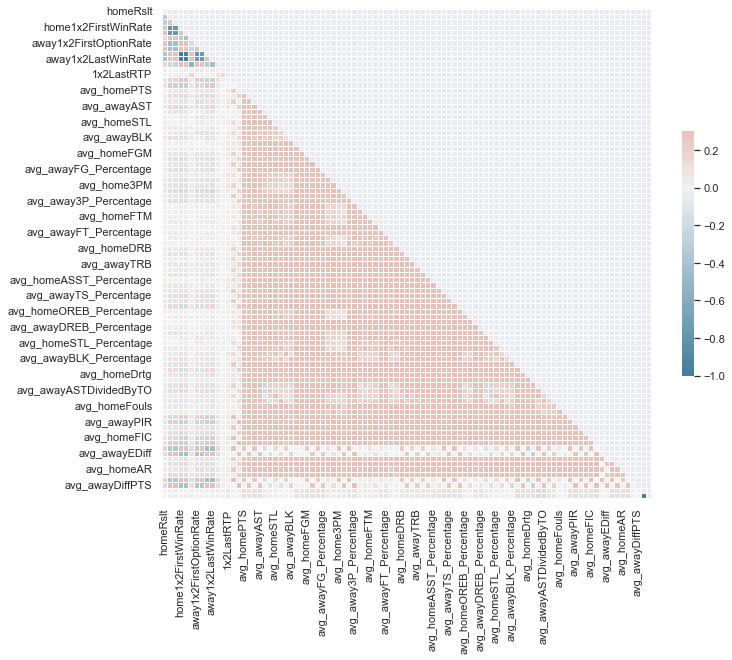

In [630]:
# 可視化分析
import seaborn as sns
from matplotlib import pyplot as plt

corr = nba_df_for_ML_dumm.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='homeRslt', ylabel='index'>

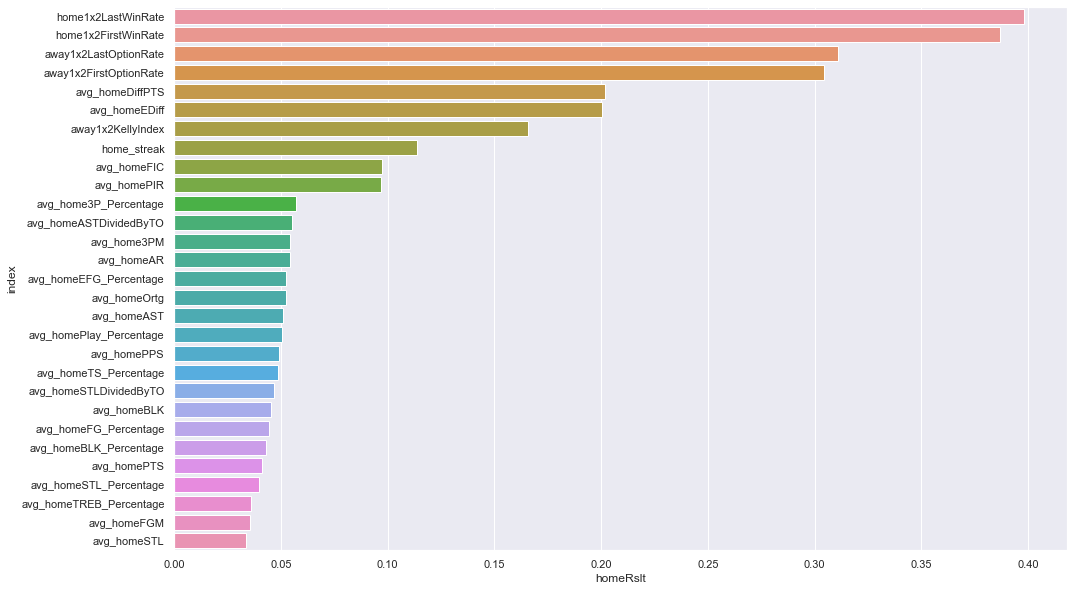

In [631]:
plt.figure(figsize=(16,10))
k = 30
cols = corr.nlargest(k, 'homeRslt')['homeRslt']
cols = cols.reset_index().loc[1:]
sns.barplot(y = 'index',x ='homeRslt',data = cols)


# 儲存資料

In [632]:
nba_df_for_ML_dumm.to_csv('nba_df_for_ML_dumm(強弱盤).csv')

# 閱讀資料

In [3]:
nba_df_for_ML = pd.read_csv('nba_df_for_ML(強弱盤).csv',index_col='Unnamed: 0')
nba_df_for_ML_dumm = pd.read_csv('nba_df_for_ML_dumm(強弱盤).csv',index_col='Unnamed: 0')

In [4]:
nba_df_for_ML

,homeRslt,gmDate,gmTime,homeAbbr,home_games,home1x2FirstOptionRate,home1x2LastOptionRate,home1x2FirstWinRate,home1x2LastWinRate,home1x2KellyIndex,...,avg_homeFIC,avg_awayFIC,avg_homeEDiff,avg_awayEDiff,avg_homePlay_Percentage,avg_awayPlay_Percentage,avg_homeAR,avg_awayAR,avg_homeDiffPTS,avg_awayDiffPTS
0,1,2014-10-28,20:00,New Orleans Pelicans,1,1.16,1.20,82.58,79.83,0.97,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1,2014-10-28,20:00,San Antonio Spurs,1,1.50,1.62,64.29,59.70,0.99,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0,2014-10-28,22:30,Los Angeles Lakers,1,3.20,3.35,29.98,28.57,0.97,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,1,2014-10-29,19:00,Charlotte Hornets,1,1.23,1.25,77.55,76.64,0.95,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,1,2014-10-29,19:00,Indiana Pacers,1,1.33,1.29,71.88,74.15,0.94,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,1,2022-01-03,20:30,Dallas Mavericks,37,1.68,1.68,57.25,57.25,0.96,...,88.20,80.175,7.42,-0.46,0.463898,0.411622,23.905105,21.523502,7.0,-0.6
8390,1,2022-01-03,22:00,Golden State Warriors,36,1.26,1.18,76.05,81.65,0.96,...,93.60,87.625,7.64,6.02,0.460140,0.460523,24.458955,20.863410,7.4,5.6
8391,1,2022-01-03,22:00,Portland Trail Blazers,36,2.60,2.55,37.35,38.11,0.99,...,73.30,84.100,-14.88,-7.18,0.416183,0.450595,18.578021,20.349306,-14.4,-7.0
8392,0,2022-01-03,22:30,Los Angeles Clippers,38,1.74,1.64,55.27,58.90,0.97,...,81.75,80.775,-2.72,-6.46,0.426758,0.429294,21.121426,20.234609,-2.8,-6.4


In [5]:
nba_df_for_ML_dumm

,homeRslt,home1x2FirstOptionRate,home1x2LastOptionRate,home1x2FirstWinRate,home1x2LastWinRate,home1x2KellyIndex,away1x2FirstOptionRate,away1x2LastOptionRate,away1x2FirstWinRate,away1x2LastWinRate,...,avg_homeEDiff,avg_awayEDiff,avg_homePlay_Percentage,avg_awayPlay_Percentage,avg_homeAR,avg_awayAR,avg_homeDiffPTS,avg_awayDiffPTS,Season_half_Post_AllStar,Season_half_Pre_AllStar
0,1,1.16,1.20,82.58,79.83,0.97,5.50,4.75,17.42,20.17,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
1,1,1.50,1.62,64.29,59.70,0.99,2.70,2.40,35.71,40.30,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
2,0,3.20,3.35,29.98,28.57,0.97,1.37,1.34,70.02,71.43,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
3,1,1.23,1.25,77.55,76.64,0.95,4.25,4.10,22.45,23.36,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
4,1,1.33,1.29,71.88,74.15,0.94,3.40,3.70,28.12,25.85,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,1,1.68,1.68,57.25,57.25,0.96,2.25,2.25,42.75,42.75,...,7.42,-0.46,0.463898,0.411622,23.905105,21.523502,7.0,-0.6,0,1
8390,1,1.26,1.18,76.05,81.65,0.96,4.00,5.25,23.95,18.35,...,7.64,6.02,0.460140,0.460523,24.458955,20.863410,7.4,5.6,0,1
8391,1,2.60,2.55,37.35,38.11,0.99,1.55,1.57,62.65,61.89,...,-14.88,-7.18,0.416183,0.450595,18.578021,20.349306,-14.4,-7.0,0,1
8392,0,1.74,1.64,55.27,58.90,0.97,2.15,2.35,44.73,41.10,...,-2.72,-6.46,0.426758,0.429294,21.121426,20.234609,-2.8,-6.4,0,1


# Sequential Feature Selection(可選)

In [866]:
nba_df_for_ML_dumm_X = nba_df_for_ML_dumm.drop('homeRslt',axis = 1)
nba_df_for_ML_dumm_y = nba_df_for_ML_dumm.homeRslt

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import GradientBoostingClassifier

SFS_GradientBoostingClassifier = GradientBoostingClassifier(max_depth=1, max_leaf_nodes=30, min_samples_leaf=100)
sfs = SFS(SFS_GradientBoostingClassifier, cv=5, scoring='neg_log_loss', n_jobs=-1 ,k_features=(10,50))
sfs.fit(nba_df_for_ML_dumm_X[:], nba_df_for_ML_dumm_y[:])

In [ ]:
pd.DataFrame(sfs.get_metric_dict())

## 調用SFS特徵進行訓練(可選)

In [29]:
nba_df_for_ML_dumm = nba_df_for_ML_dumm[['homeRslt']+list(sfs.k_feature_names_)]
nba_df_for_ML_dumm

,homeRslt,home_streak,home_avg_homePIR,away_avg_awayPIR,home_avg_homePTS,away_avg_awayPTS,away_avg_awayFGA,home_avg_homeFGM,away_avg_awayFGM,away_avg_away3PM,...,away_avg_awayASST_Percentage,away_avg_awayTS_Percentage,away_avg_awayEFG_Percentage,home_avg_homeDREB_Percentage,home_avg_homeOrtg,home_avg_homeDrtg,away_avg_awayDrtg,home_avg_homeASTDividedByTO,away_avg_awayASTDividedByTO,Season_half_Pre_AllStar
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0000,0.0000,0.00,0.00,0.00,0.00,0.000,0.000,1
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0000,0.0000,0.00,0.00,0.00,0.00,0.000,0.000,1
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0000,0.0000,0.00,0.00,0.00,0.00,0.000,0.000,1
3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0000,0.0000,0.00,0.00,0.00,0.00,0.000,0.000,1
4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0000,0.0000,0.00,0.00,0.00,0.00,0.000,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,1,0,137.8,102.2,118.6,99.4,88.2,43.6,36.8,11.8,...,59.66,0.5184,0.4878,82.10,119.82,113.80,115.22,2.326,1.562,0
7852,1,1,113.2,120.4,104.0,107.8,85.4,39.4,39.8,13.6,...,56.78,0.5800,0.5456,73.76,111.62,117.92,106.74,2.548,1.416,0
7853,1,1,134.6,113.4,116.6,107.4,91.2,41.6,42.4,11.6,...,58.68,0.5514,0.5282,76.22,116.66,114.42,115.74,2.086,2.290,0


# 正規化

In [6]:
# 正規化
from sklearn.preprocessing import MinMaxScaler

X = nba_df_for_ML_dumm.drop('homeRslt',axis = 1)
y = nba_df_for_ML_dumm.homeRslt

scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X= scaler.transform(X)
X

array([[0.008     , 0.01176471, 0.85046322, ..., 0.40372671, 0.        ,
        1.        ],
       [0.025     , 0.03647059, 0.65111717, ..., 0.40372671, 0.        ,
        1.        ],
       [0.11      , 0.13823529, 0.27716621, ..., 0.40372671, 0.        ,
        1.        ],
       ...,
       [0.08      , 0.09117647, 0.35749319, ..., 0.31677019, 0.        ,
        1.        ],
       [0.037     , 0.03764706, 0.55280654, ..., 0.3242236 , 0.        ,
        1.        ],
       [0.034     , 0.03764706, 0.57438692, ..., 0.54782609, 0.        ,
        1.        ]])

# 建立強弱盤預測模型

In [7]:
nba_df_for_ML.gmDate = nba_df_for_ML.gmDate.astype('datetime64')
X_test = X[nba_df_for_ML.gmDate>=datetime.strptime('2021/10/01','%Y/%m/%d')]
y_test = y[nba_df_for_ML.gmDate>=datetime.strptime('2021/10/01','%Y/%m/%d')]

X= X[nba_df_for_ML.gmDate<datetime.strptime('2021/10/01','%Y/%m/%d')]
y= y[nba_df_for_ML.gmDate<datetime.strptime('2021/10/01','%Y/%m/%d')]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    train_size=0.75,
                                                    test_size=0.25,
                                                    shuffle=True
                                                    )

In [9]:
print('訓練集:',X_train.shape[0])
print('驗證集:',X_val.shape[0])
print('測試集:',X_test.shape[0])

訓練集: 5882
驗證集: 1961
測試集: 551


## 1.DecisionTreeClassifier

In [643]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [644]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=40).fit(X_train, y_train)
my_param_grid = [{"min_samples_leaf": [3, 5 ,8,2],"min_weight_fraction_leaf": [0.01, 0.02, 0.03,0.05,0.08], "max_leaf_nodes" : [10 ,20 ,40, 60, 70]}]
k = 10
decision_tree_gs = GridSearchCV(decision_tree, my_param_grid, scoring='neg_log_loss',cv=k,n_jobs=-1)
decision_tree_gs.fit(X_train, y_train)
decision_tree_best = decision_tree_gs.best_estimator_

In [645]:
# Cross Validation:
print('accuracy : ',(cross_val_score(decision_tree_best, X_val, y_val, cv=9, scoring='accuracy')).mean().round(3))
print('f1 : ',(cross_val_score(decision_tree_best, X_val, y_val, cv=9, scoring='f1')).mean().round(3))
print('recall : ',(cross_val_score(decision_tree_best, X_val, y_val, cv=9, scoring='recall')).mean().round(3))
print('precision : ',(cross_val_score(decision_tree_best, X_val, y_val, cv=9, scoring='precision')).mean().round(3))

accuracy :  0.661
f1 :  0.714
recall :  0.746
precision :  0.686


In [646]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [647]:
random_forest = RandomForestClassifier(n_estimators=100,max_leaf_nodes=100, min_weight_fraction_leaf= 0.01)
my_param_grid = [{"n_estimators": [20,30, 70 ,100],"max_leaf_nodes": [ 20,30, 70, 100], "min_samples_leaf" : [20,30, 70, 100]}]
k = 7
random_forest_gs = GridSearchCV(random_forest, my_param_grid, scoring='neg_log_loss',cv=k,n_jobs=-1)
random_forest_gs.fit(X_train, y_train)

random_forest_best = random_forest_gs.best_estimator_

In [648]:
# Cross Validation:
print('accuracy : ',(cross_val_score(random_forest_best, X_val, y_val, cv=9, scoring='accuracy')).mean().round(3))
print('f1 : ',(cross_val_score(random_forest_best, X_val, y_val, cv=9, scoring='f1')).mean().round(3))
print('recall : ',(cross_val_score(random_forest_best, X_val, y_val, cv=9, scoring='recall')).mean().round(3))
print('precision : ',(cross_val_score(random_forest_best, X_val, y_val, cv=9, scoring='precision')).mean().round(3))

accuracy :  0.679
f1 :  0.716
recall :  0.714
precision :  0.713


## 3.GradientBoostingClassifier :

In [649]:
from sklearn.ensemble import GradientBoostingClassifier

In [650]:
GradientBoosting = GradientBoostingClassifier(n_estimators=100, max_leaf_nodes=100,max_depth=1)
my_param_grid = [{"n_estimators": [20,30, 70 ,100],"max_leaf_nodes": [ 20,30, 70, 100], "min_samples_leaf" : [20,30, 70, 100]}]
k = 10
GradientBoosting_gs = GridSearchCV(GradientBoosting, my_param_grid, scoring='neg_log_loss',cv=k,n_jobs=-1)
GradientBoosting_gs.fit(X_train, y_train)
GradientBoosting_best = GradientBoosting_gs.best_estimator_

In [651]:
# Cross Validation:
print('accuracy : ',(cross_val_score(GradientBoosting_best, X_val, y_val, cv=9, scoring='accuracy')).mean().round(3))
print('f1 : ',(cross_val_score(GradientBoosting_best, X_val, y_val, cv=9, scoring='f1')).mean().round(3))
print('recall : ',(cross_val_score(GradientBoosting_best, X_val, y_val, cv=9, scoring='recall')).mean().round(3))
print('precision : ',(cross_val_score(GradientBoosting_best, X_val, y_val, cv=9, scoring='precision')).mean().round(3))

accuracy :  0.672
f1 :  0.715
recall :  0.726
precision :  0.705


<AxesSubplot:title={'center':'Features importance'}>

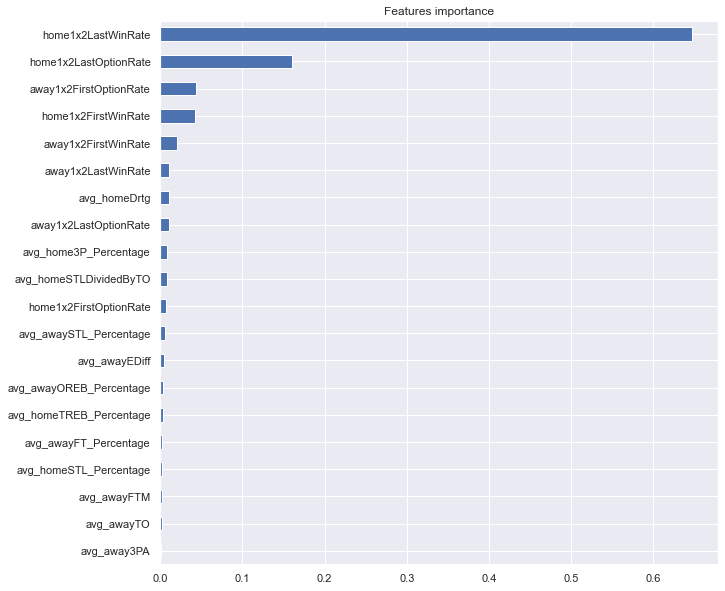

In [652]:
plt.figure(figsize = (10,10))
pd.Series(GradientBoosting_best.feature_importances_, index=nba_df_for_ML_dumm.drop('homeRslt',axis=1).columns).sort_values().tail(20).plot.barh(title='Features importance')

## 解析預測效能

In [653]:
evaluates = []
for model in [GradientBoosting_best,random_forest_best,decision_tree_best]:
    evaluate={}
    evaluate['model']=model.__class__.__name__
    evaluate['accuracy']=(cross_val_score(model, X_val, y_val, cv=9, scoring='accuracy')).mean().round(3)
    evaluate['f1']=(cross_val_score(model, X_val, y_val, cv=9, scoring='f1')).mean().round(3)
    evaluate['recall']=(cross_val_score(model, X_val, y_val, cv=9, scoring='recall')).mean().round(3)
    evaluate['precision']=(cross_val_score(model, X_val, y_val, cv=9, scoring='precision')).mean().round(3)
    evaluates.append(evaluate)

In [654]:
import matplotlib.pyplot as plt
evaluates = pd.DataFrame(evaluates)
evaluates = evaluates.set_index('model')
evaluates

,accuracy,f1,recall,precision
model,,,,
GradientBoostingClassifier,0.672,0.715,0.726,0.705
RandomForestClassifier,0.676,0.714,0.722,0.717
DecisionTreeClassifier,0.661,0.714,0.746,0.686


## 保存模型

In [657]:
import joblib
#保存模型
joblib.dump(GradientBoosting_best, '強弱盤_GB.model')


['強弱盤_GB.model']

# 讀取模型

In [19]:
import joblib
#读取模型
GradientBoosting_best = joblib.load('強弱盤_GB.model')

# 虛擬獲利-1

In [20]:
nba_df_for_ML = pd.read_csv('nba_df_for_ML(強弱盤).csv',index_col='Unnamed: 0')
nba_df_for_ML_dumm = pd.read_csv('nba_df_for_ML_dumm(強弱盤).csv',index_col='Unnamed: 0')

# 正規化
from sklearn.preprocessing import MinMaxScaler
X = nba_df_for_ML_dumm.drop('homeRslt',axis = 1)
y = nba_df_for_ML_dumm.homeRslt
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

#日期轉型
nba_df_for_ML.gmDate = nba_df_for_ML.gmDate.astype('datetime64')
#抓出>2021/10/01的test set
nba_df_for_ML_test = nba_df_for_ML[nba_df_for_ML.gmDate>=datetime.strptime('2021/10/01','%Y/%m/%d')]
X_test, y_test = X.loc[nba_df_for_ML_test.index],  y.loc[nba_df_for_ML_test.index]

print('測試集:',nba_df_for_ML_test.shape[0])

測試集: 551


In [21]:
# 取出超過門檻的預測值
idxs = []
for index in nba_df_for_ML_test.index:
    results = GradientBoosting_best.predict_proba(np.array([X_test.loc[index]]))
    if results[0][1]>results[0][0] and results[0][1]>=0.9:
        idxs.append(index)
    if results[0][1]<results[0][0] and results[0][0]>=0.6:
        idxs.append(index)

# 取出預測
pred_y =  pd.DataFrame(GradientBoosting_best.predict(X_test.loc[idxs]),index=X_test.loc[idxs].index,columns=['homeRslt'])
# 取出賽果
ot = len(nba_df_for_ML_test)
nba_df_for_ML_test  = nba_df_for_ML_test.loc[idxs]
# 取出Y
y_test = pd.DataFrame(y_test.loc[idxs],columns=['homeRslt'])

In [22]:
records = pd.DataFrame(pred_y == y_test)
print('原本數量 : ',ot)
print('預測數量 : ',len(records))
print('預測比例 : ',round(len(records)/ot*100,1),'%')
print('預測準確率 : ',round(float(records[records.homeRslt==True].count()/records.count()*100),2),'%')

原本數量 :  551
預測數量 :  122
預測比例 :  22.1 %
預測準確率 :  74.59 %


In [23]:
for index in idxs:
    if bool(records.loc[index].homeRslt) == True:
        if int(y_test.loc[index]) == 1:
            nba_df_for_ML_test.loc[index, 'profit'] =( nba_df_for_ML_test.loc[index, 'home1x2LastOptionRate']-1) * 1000
            nba_df_for_ML_test.loc[index, 'select_1x2LastOptionRate'] = nba_df_for_ML_test.loc[index, 'home1x2LastOptionRate']
        else:
            nba_df_for_ML_test.loc[index, 'profit'] = (nba_df_for_ML_test.loc[index, 'away1x2LastOptionRate']-1) * 1000
            nba_df_for_ML_test.loc[index, 'select_1x2LastOptionRate'] = nba_df_for_ML_test.loc[index, 'away1x2LastOptionRate']
    else:
        if int(y_test.loc[index]) == 1:
            nba_df_for_ML_test.loc[index, 'profit'] = -1000
            nba_df_for_ML_test.loc[index, 'select_1x2LastOptionRate'] = 0
        else:
            nba_df_for_ML_test.loc[index, 'profit'] = -1000
            nba_df_for_ML_test.loc[index, 'select_1x2LastOptionRate'] = 0
print('虛擬獲利 :', sum(nba_df_for_ML_test.profit))

虛擬獲利 : 6320.0


C:\Users\xin\AppData\Local\Temp/ipykernel_12240/2319921246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df_for_ML_test_Group['isMkMoney'] = nba_df_for_ML_test_Group.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_12240/2319921246.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df_for_ML_test_Group['gms'] = nba_df_for_ML_test_Group.profit.apply(lambda p: 1)


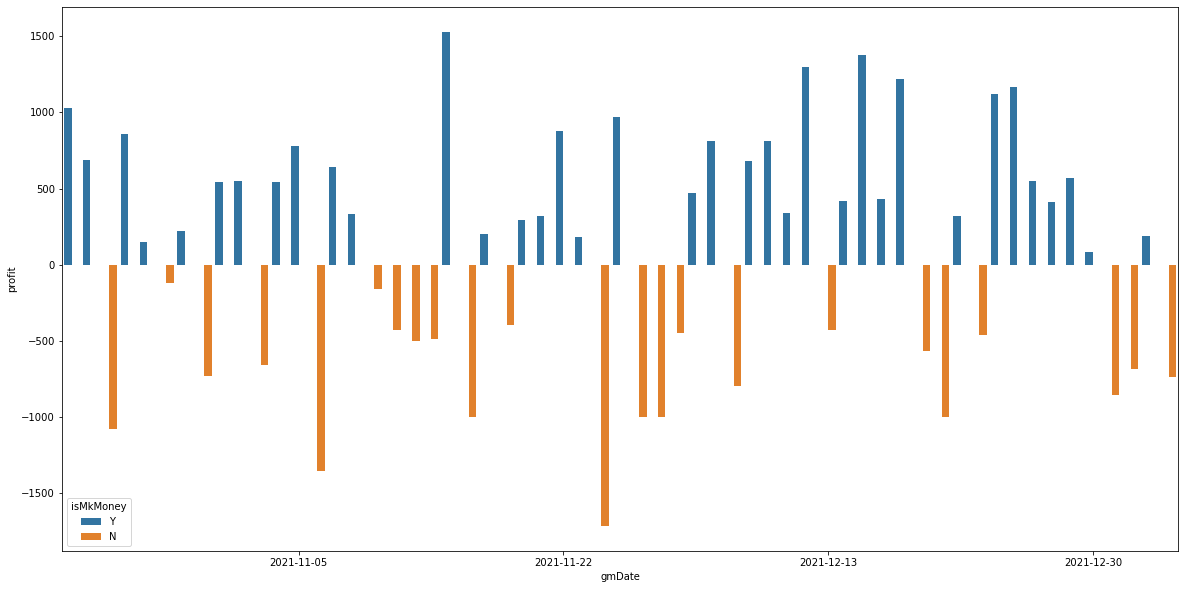

In [24]:
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib import pyplot as plt
# 每天虛擬獲利情形
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
nba_df_for_ML_test_Group = nba_df_for_ML_test[['gmDate','profit','select_1x2LastOptionRate']]
nba_df_for_ML_test_Group['isMkMoney'] = nba_df_for_ML_test_Group.profit.apply(lambda p: 1 if p > 0 else 0)
nba_df_for_ML_test_Group['gms'] = nba_df_for_ML_test_Group.profit.apply(lambda p: 1)
nba_df_for_ML_test_Group = nba_df_for_ML_test_Group[['gmDate','profit','isMkMoney','gms','select_1x2LastOptionRate']].groupby(['gmDate']).sum().reset_index()

nba_df_for_ML_test_Group['select_1x2LastOptionRate'] = nba_df_for_ML_test_Group['select_1x2LastOptionRate']/nba_df_for_ML_test_Group['isMkMoney']
nba_df_for_ML_test_Group['accuracy'] = nba_df_for_ML_test_Group['isMkMoney']/nba_df_for_ML_test_Group['gms']
nba_df_for_ML_test_Group['>=50%'] = np.where(nba_df_for_ML_test_Group['isMkMoney']/nba_df_for_ML_test_Group['gms'] >= 0.5,'Y','N')
nba_df_for_ML_test_Group['isMkMoney' ]= nba_df_for_ML_test_Group.profit.apply(lambda p: 'Y' if p > 0 else 'N')
nba_df_for_ML_test_Group['gmDate'] = nba_df_for_ML_test_Group['gmDate'].map(lambda s: s.strftime('%Y-%m-%d'))

ax = sns.barplot(x='gmDate', y='profit', data=nba_df_for_ML_test_Group,hue = 'isMkMoney')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))


In [28]:
nba_df_for_ML_test_Group.profit

0     1030.0
1      690.0
2    -1080.0
3      860.0
4      150.0
5     -120.0
6      220.0
7     -730.0
8      540.0
9      550.0
10    -660.0
11     540.0
12     780.0
13   -1360.0
14     640.0
15     330.0
16    -160.0
17    -430.0
18    -500.0
19    -490.0
20    1530.0
21   -1000.0
22     200.0
23    -400.0
24     290.0
25     320.0
26     880.0
27     180.0
28   -1720.0
29     970.0
30   -1000.0
31   -1000.0
32    -450.0
33     470.0
34     810.0
35    -800.0
36     680.0
37     810.0
38     340.0
39    1300.0
40    -430.0
41     420.0
42    1380.0
43     430.0
44    1220.0
45    -570.0
46   -1000.0
47     320.0
48    -460.0
49    1120.0
50    1170.0
51     550.0
52     410.0
53     570.0
54      80.0
55    -860.0
56    -690.0
57     190.0
58    -740.0
Name: profit, dtype: float64

In [19]:
print('平均當日賠錢:',nba_df_for_ML_test_Group[nba_df_for_ML_test_Group.profit<0].profit.mean())
print('平均當日賺錢:',nba_df_for_ML_test_Group[nba_df_for_ML_test_Group.profit>=0].profit.mean())

平均當日賠錢: -723.9130434782609
平均當日賺錢: 638.0555555555555


In [20]:
print('平均贏錢賠錢:',nba_df_for_ML_test_Group.select_1x2LastOptionRate.mean())

平均贏錢賠錢: 1.4075


<AxesSubplot:ylabel='isMkMoney'>

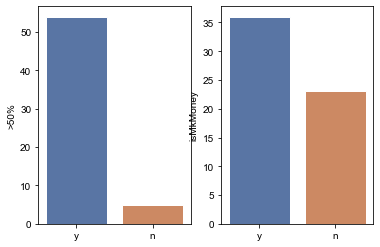

In [21]:
fig, axes = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(16,10)})

# 計天猜中>50%與<50%總數
sns.barplot( x =['y','n'] ,y='>50%' ,data = pd.DataFrame({'>50%':[int(nba_df_for_ML_test_Group[nba_df_for_ML_test_Group['>=50%']=='Y']['>=50%'].count()),int(nba_df_for_ML_test_Group[nba_df_for_ML_test_Group['>=50%']=='N']['>=50%'].count())]}),ax=axes[0])

# 計天虛擬獲利>0與<0總數
sns.barplot( x =['y','n'] ,y='isMkMoney' ,data = pd.DataFrame({'isMkMoney':[int(nba_df_for_ML_test_Group[nba_df_for_ML_test_Group['isMkMoney']=='Y']['isMkMoney'].count()),int(nba_df_for_ML_test_Group[nba_df_for_ML_test_Group['isMkMoney']=='N']['isMkMoney'].count())]}),ax=axes[1])

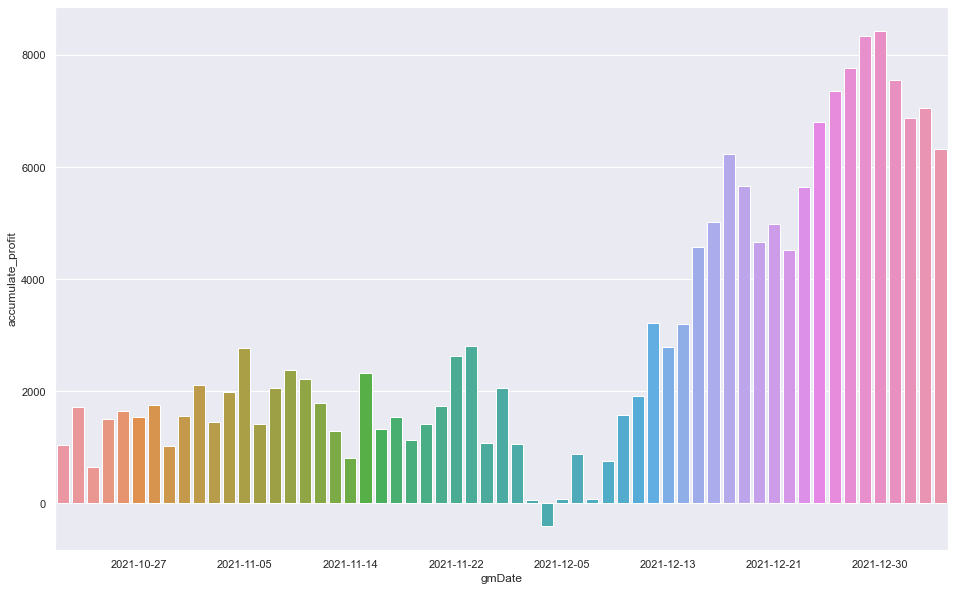

In [22]:
import matplotlib.dates as mdates
import seaborn as sns
# 每天虛擬獲利情形
nba_df_for_ML_test_Group['accumulate_profit'] = 0
for idx in nba_df_for_ML_test_Group.index:
    if idx > 0:
        nba_df_for_ML_test_Group.loc[idx,'accumulate_profit'] = nba_df_for_ML_test_Group.loc[idx-1,'accumulate_profit']+nba_df_for_ML_test_Group.loc[idx,'profit']
    else:
        nba_df_for_ML_test_Group.loc[idx,'accumulate_profit'] = nba_df_for_ML_test_Group.loc[idx,'profit']
#nba_df_for_ML_test_Group['gmDate'] = nba_df_for_ML_test_Group['gmDate'].map(lambda s: s.strftime('%Y-%m-%d'))

ax = sns.barplot(x='gmDate', y='accumulate_profit', data=nba_df_for_ML_test_Group)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

# 虛擬獲利-2

In [7]:
nba_df_for_ML = pd.read_csv('nba_df_for_ML(強弱盤).csv',index_col='Unnamed: 0')
nba_df_for_ML

,homeRslt,gmDate,gmTime,homeAbbr,home_games,home1x2FirstOptionRate,home1x2LastOptionRate,home1x2FirstWinRate,home1x2LastWinRate,home1x2KellyIndex,...,avg_homeFIC,avg_awayFIC,avg_homeEDiff,avg_awayEDiff,avg_homePlay_Percentage,avg_awayPlay_Percentage,avg_homeAR,avg_awayAR,avg_homeDiffPTS,avg_awayDiffPTS
0,1,2014-10-28,20:00,New Orleans Pelicans,1,1.16,1.20,82.58,79.83,0.97,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1,2014-10-28,20:00,San Antonio Spurs,1,1.50,1.62,64.29,59.70,0.99,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0,2014-10-28,22:30,Los Angeles Lakers,1,3.20,3.35,29.98,28.57,0.97,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,1,2014-10-29,19:00,Charlotte Hornets,1,1.23,1.25,77.55,76.64,0.95,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,1,2014-10-29,19:00,Indiana Pacers,1,1.33,1.29,71.88,74.15,0.94,...,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,1,2022-01-03,20:30,Dallas Mavericks,37,1.68,1.68,57.25,57.25,0.96,...,88.20,80.175,7.42,-0.46,0.463898,0.411622,23.905105,21.523502,7.0,-0.6
8390,1,2022-01-03,22:00,Golden State Warriors,36,1.26,1.18,76.05,81.65,0.96,...,93.60,87.625,7.64,6.02,0.460140,0.460523,24.458955,20.863410,7.4,5.6
8391,1,2022-01-03,22:00,Portland Trail Blazers,36,2.60,2.55,37.35,38.11,0.99,...,73.30,84.100,-14.88,-7.18,0.416183,0.450595,18.578021,20.349306,-14.4,-7.0
8392,0,2022-01-03,22:30,Los Angeles Clippers,38,1.74,1.64,55.27,58.90,0.97,...,81.75,80.775,-2.72,-6.46,0.426758,0.429294,21.121426,20.234609,-2.8,-6.4


In [162]:
import pandas as pd
import pymssql
import pandasql as ps
from datetime import datetime, timezone, timedelta

SourceCode = 'Bet365'  # 台灣運彩編碼
server = "gh.ecocoshiny.com"
database = 'GoHit'
user = 'userLC'
password = '123123Gohit'
TournamentText = 'NBA'

def get_ConnectionFromDB():
    db = pymssql.connect(server, user, password, database)
    cursor = db.cursor()
    return db, cursor

def TeamNameCorrection(Taiwan_TeamName, cursor):
    sql = f"SELECT teams.team FROM teamText join teams on teamText.team_id = teams.id where Text = '{Taiwan_TeamName}' ;"
    cursor.execute(sql)
    result = cursor.fetchone()
    if result:
        print(f'{Taiwan_TeamName}更換名稱為{result[0]}')
        return result[0]
    else:
        return Taiwan_TeamName

import time
def getOddsDataFrame(MatchTime, db, cursor):
    sql = f'''SELECT MatchResults.EventCode,MatchTime,HomeTeam,AwayTeam,HomeScore,AwayScore,Odds.GroupOptionCode,Odds.OptionCode,Odds.OptionRate
              from MatchResults
              inner join Odds on Odds.EventCode = MatchResults.EventCode
              where TournamentText = '{TournamentText}' and Odds.SourceCode='{SourceCode}' and Odds.GroupOptionCode = 20 AND
                    MatchTime >= '{MatchTime}' order by MatchTime '''

    return pd.read_sql(sql, db)

def get_MatchResults(nba_df_for_ML):
    db, cursor = get_ConnectionFromDB()
    MatchResults = nba_df_for_ML.copy()
    MatchResults['Odd_H'] = 0
    MatchResults['Odd_A'] = 0
    Odds = getOddsDataFrame('2021-10-20 00:00:00', db, cursor)
    for index, game in nba_df_for_ML.iterrows():
        MatchTime =datetime.strptime(game['gmDate']+' '+game['gmTime'], "%Y-%m-%d %H:%M")+timedelta(hours=13)
        if MatchTime <= datetime.strptime('2021-10-20 00:00', "%Y-%m-%d %H:%M"):
            continue
        print(MatchTime)
        HomeTeam = TeamNameCorrection(game['homeAbbr'],cursor)
        AwayTeam = TeamNameCorrection(game['awayAbbr'],cursor)

        offset_sec = 120*60
        timestamp = time.mktime(MatchTime.timetuple())
        top = datetime.fromtimestamp(timestamp+offset_sec)
        bottom = datetime.fromtimestamp(timestamp-offset_sec)

        Odd = Odds[(Odds['MatchTime']>=bottom) & (Odds['MatchTime']<top) & (Odds.HomeTeam==HomeTeam) & (Odds.AwayTeam==AwayTeam)]

        for _,odd in Odd.iterrows():
            if int(odd['OptionCode']) == 1:
                MatchResults.loc[index,'Odd_H'] =odd['OptionRate']
            else:
                MatchResults.loc[index,'Odd_A'] =odd['OptionRate']

        print(MatchResults.loc[index]['Odd_H'],MatchResults.loc[index]['Odd_A'])
    cursor.close()
    db.close()
    return MatchResults

In [163]:
MatchResults = get_MatchResults(nba_df_for_ML)
MatchResults

2021-10-20 08:30:00
Milwaukee Bucks更換名稱為MIL Bucks
Brooklyn Nets更換名稱為BKN Nets
1.83 2.00
2021-10-20 11:00:00
Los Angeles Lakers更換名稱為LA Lakers
Golden State Warriors更換名稱為GS Warriors
1.64 2.35
2021-10-21 08:00:00
Charlotte Hornets更換名稱為CHA Hornets
Indiana Pacers更換名稱為IND Pacers
1.86 1.95
2021-10-21 08:00:00
Detroit Pistons更換名稱為DET Pistons
Chicago Bulls更換名稱為CHI Bulls
2.75 1.47
2021-10-21 08:30:00
New York Knicks更換名稱為NY Knicks
Boston Celtics更換名稱為BOS Celtics
1.76 2.10
2021-10-21 08:30:00
Toronto Raptors更換名稱為TOR Raptors
Washington Wizards更換名稱為WAS Wizards
1.71 2.20
2021-10-21 09:00:00
Memphis Grizzlies更換名稱為MEM Grizzlies
Cleveland Cavaliers更換名稱為CLE Cavaliers
1.33 3.40
2021-10-21 09:00:00
Minnesota Timberwolves更換名稱為MIN Timberwolves
Houston Rockets更換名稱為HOU Rockets
1.40 3.05
2021-10-21 09:00:00
New Orleans Pelicans更換名稱為NO Pelicans
Philadelphia 76ers更換名稱為PHI 76ers
2.45 1.60
2021-10-21 09:30:00
San Antonio Spurs更換名稱為SA Spurs
Orlando Magic更換名稱為ORL Magic
1.38 3.15
2021-10-21 10:00:00
Utah Jazz更換名稱為UTA Jaz

,homeRslt,gmDate,gmTime,homeAbbr,home_games,home1x2FirstOptionRate,home1x2LastOptionRate,home1x2FirstWinRate,home1x2LastWinRate,home1x2KellyIndex,...,avg_homeEDiff,avg_awayEDiff,avg_homePlay_Percentage,avg_awayPlay_Percentage,avg_homeAR,avg_awayAR,avg_homeDiffPTS,avg_awayDiffPTS,Odd_H,Odd_A
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1,2014-10-28,20:00,New Orleans Pelicans,1,1.16,1.20,82.58,79.83,0.97,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0
1,1,2014-10-28,20:00,San Antonio Spurs,1,1.50,1.62,64.29,59.70,0.99,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0
2,0,2014-10-28,22:30,Los Angeles Lakers,1,3.20,3.35,29.98,28.57,0.97,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0
3,1,2014-10-29,19:00,Charlotte Hornets,1,1.23,1.25,77.55,76.64,0.95,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0
4,1,2014-10-29,19:00,Indiana Pacers,1,1.33,1.29,71.88,74.15,0.94,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,1,2022-01-03,20:30,Dallas Mavericks,37,1.68,1.68,57.25,57.25,0.96,...,7.42,-0.46,0.463898,0.411622,23.905105,21.523502,7.0,-0.6,1.66,2.30
8390,1,2022-01-03,22:00,Golden State Warriors,36,1.26,1.18,76.05,81.65,0.96,...,7.64,6.02,0.460140,0.460523,24.458955,20.863410,7.4,5.6,1.18,5.25
8391,1,2022-01-03,22:00,Portland Trail Blazers,36,2.60,2.55,37.35,38.11,0.99,...,-14.88,-7.18,0.416183,0.450595,18.578021,20.349306,-14.4,-7.0,2.60,1.55


In [165]:
#刪除nba_df_for_ML觀察用特徵:
nba_df_for_ML_dumm = nba_df_for_ML.drop(['gmDate','gmTime','homeAbbr','home_games','awayAbbr','away_games'],axis=1)
#虛擬變數
nba_df_for_ML_dumm = pd.get_dummies(nba_df_for_ML_dumm)
#Season_half_Post_AllStar
nba_df_for_ML_dumm = nba_df_for_ML_dumm.drop(['Season_half_Post_AllStar'],axis=1)
# SFS
#nba_df_for_ML_dumm = nba_df_for_ML_dumm[['homeRslt']+list(sfs.k_feature_names_)]
# 正規化
from sklearn.preprocessing import MinMaxScaler
X = nba_df_for_ML_dumm.drop('homeRslt',axis = 1)
y = nba_df_for_ML_dumm.homeRslt
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X= scaler.transform(X)
X

array([[0.008     , 0.01176471, 0.85046322, ..., 0.62176166, 0.40372671,
        1.        ],
       [0.025     , 0.03647059, 0.65111717, ..., 0.62176166, 0.40372671,
        1.        ],
       [0.11      , 0.13823529, 0.27716621, ..., 0.62176166, 0.40372671,
        1.        ],
       ...,
       [0.08      , 0.09117647, 0.35749319, ..., 0.43523316, 0.31677019,
        1.        ],
       [0.037     , 0.03764706, 0.55280654, ..., 0.58549223, 0.3242236 ,
        1.        ],
       [0.034     , 0.03764706, 0.57438692, ..., 0.6865285 , 0.54782609,
        1.        ]])

In [186]:
MatchResults.Odd_H = MatchResults.Odd_H.astype('float64')
MatchResults.Odd_A = MatchResults.Odd_A.astype('float64')


# 取出有賠率的索引
MatchResultsIndex = MatchResults[MatchResults.Odd_H>0][['homeRslt','Odd_H','Odd_A']].index

# 取出超過門檻的預測值
idxs = []
for Index in MatchResultsIndex:
    results = GradientBoosting_best.predict_proba([X[Index]])
    if results[0][1]>results[0][0] and results[0][1]>=0.7:
        idxs.append(Index)
    if results[0][1]<results[0][0] and results[0][0]>=0.7:
        idxs.append(Index)
MatchResultsIndex = idxs

# 取出預測
MatchResults_pred_y = GradientBoosting_best.predict(X[MatchResultsIndex])
# 取出賽果
MatchResults2  = MatchResults.loc[MatchResultsIndex]
# 取出Y
MatchResults_y = y[MatchResultsIndex]

In [187]:
records = pd.DataFrame(MatchResults_y == MatchResults_pred_y)
records[records.homeRslt==True].count()/records.count()

homeRslt    0.797546
dtype: float64

In [188]:
print('預測數量 : ',len(records))

預測數量 :  163


In [189]:
for index in MatchResults2.index:
    if records.loc[index].homeRslt == True:
        if MatchResults_y.loc[index] == 1:
            MatchResults2.loc[index,'profit'] = MatchResults2.loc[index,'Odd_H']*1000-1000
        else:
            MatchResults2.loc[index,'profit'] = MatchResults2.loc[index,'Odd_A']*1000-1000
    else:
        if MatchResults_y.loc[index] == 1:
            MatchResults2.loc[index,'profit'] = -1000
        else:
            MatchResults2.loc[index,'profit'] = -1000

In [190]:
print('虛擬獲利 :',sum(MatchResults2.profit))

虛擬獲利 : -4780.0


C:\Users\xin\AppData\Local\Temp/ipykernel_15240/3872322315.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_15240/3872322315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)


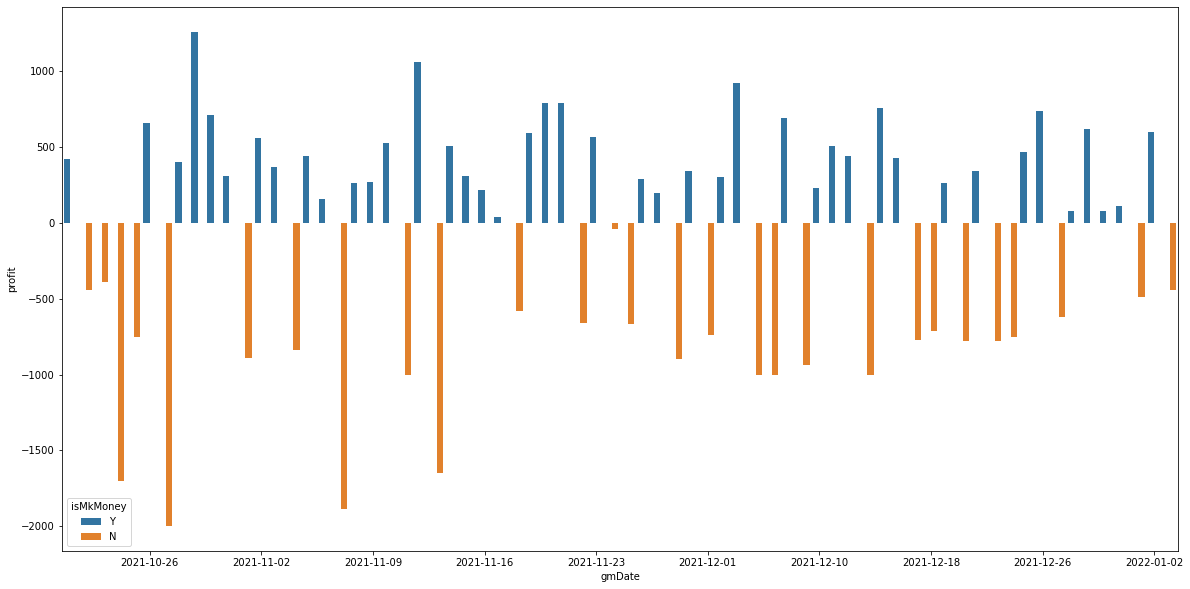

In [191]:
import matplotlib.dates as mdates
import seaborn as sns
# 每天虛擬獲利情形
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
MatchResultsGroup = MatchResults2[['gmDate','profit']]
MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)
MatchResultsGroup = MatchResultsGroup[['gmDate','profit','isMkMoney','gms']].groupby(['gmDate']).sum().reset_index()
MatchResultsGroup['>=50%'] = np.where(MatchResultsGroup['isMkMoney']/MatchResultsGroup['gms'] >= 0.5,'Y','N')
MatchResultsGroup['isMkMoney' ]= MatchResultsGroup.profit.apply(lambda p: 'Y' if p > 0 else 'N')

ax = sns.barplot(x='gmDate', y='profit', data=MatchResultsGroup,hue = 'isMkMoney')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

C:\Users\xin\AppData\Local\Temp/ipykernel_15240/3114824656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_15240/3114824656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)


<AxesSubplot:ylabel='>50%'>

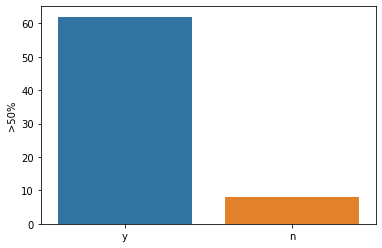

In [192]:
# 計天猜中>50%與<50%總數
MatchResultsGroup = MatchResults2[['gmDate','profit']]
MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)
MatchResultsGroup = MatchResultsGroup[['gmDate','profit','isMkMoney','gms']].groupby(['gmDate']).sum().reset_index()
MatchResultsGroup['>=50%'] = np.where(MatchResultsGroup['isMkMoney']/MatchResultsGroup['gms'] >= 0.5,'Y','N')
MatchResultsGroup['isMkMoney' ]= MatchResultsGroup.profit.apply(lambda p: 'Y' if p > 0 else 'N')

sns.barplot( x =['y','n'] ,y='>50%' ,data = pd.DataFrame({'>50%':[int(MatchResultsGroup[MatchResultsGroup['>=50%']=='Y']['>=50%'].count()),int(MatchResultsGroup[MatchResultsGroup['>=50%']=='N']['>=50%'].count())]}))

C:\Users\xin\AppData\Local\Temp/ipykernel_15240/3443735752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_15240/3443735752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)


<AxesSubplot:ylabel='isMkMoney'>

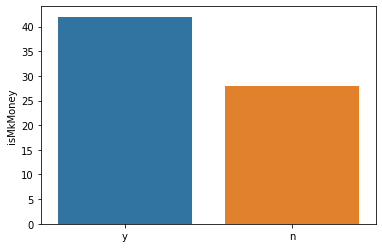

In [193]:
# 計天虛擬獲利>0與<0總數
MatchResultsGroup = MatchResults2[['gmDate','profit']]
MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)
MatchResultsGroup = MatchResultsGroup[['gmDate','profit','isMkMoney','gms']].groupby(['gmDate']).sum().reset_index()
MatchResultsGroup['>=50%'] = np.where(MatchResultsGroup['isMkMoney']/MatchResultsGroup['gms'] >= 0.5,'Y','N')
MatchResultsGroup['isMkMoney' ]= MatchResultsGroup.profit.apply(lambda p: 'Y' if p > 0 else 'N')

sns.barplot( x =['y','n'] ,y='isMkMoney' ,data = pd.DataFrame({'isMkMoney':[int(MatchResultsGroup[MatchResultsGroup['isMkMoney']=='Y']['isMkMoney'].count()),int(MatchResultsGroup[MatchResultsGroup['isMkMoney']=='N']['isMkMoney'].count())]}))

C:\Users\xin\AppData\Local\Temp/ipykernel_15240/4015121101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_15240/4015121101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)


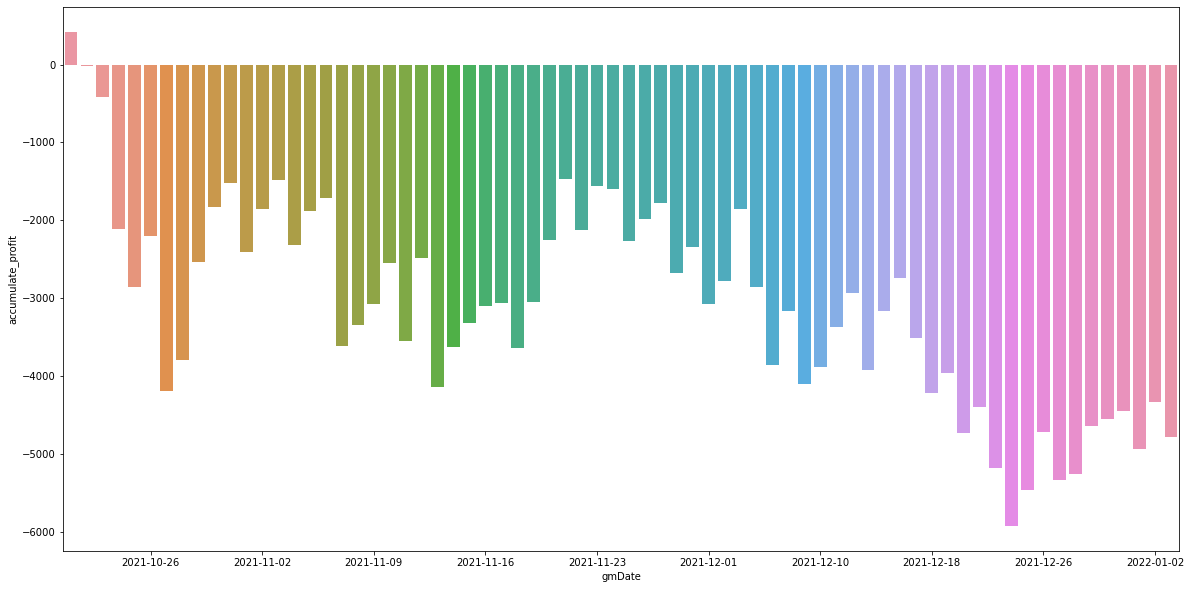

In [195]:
import matplotlib.dates as mdates
import seaborn as sns
# 每天虛擬獲利情形
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
MatchResultsGroup = MatchResults2[['gmDate','profit']]
MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)
MatchResultsGroup = MatchResultsGroup[['gmDate','profit','isMkMoney','gms']].groupby(['gmDate']).sum().reset_index()
MatchResultsGroup['>=50%'] = np.where(MatchResultsGroup['isMkMoney']/MatchResultsGroup['gms'] >= 0.5,'Y','N')
MatchResultsGroup['isMkMoney' ]= MatchResultsGroup.profit.apply(lambda p: 'Y' if p > 0 else 'N')

MatchResultsGroup['accumulate_profit'] = 0
for idx in MatchResultsGroup.index:
    if idx > 0:
        MatchResultsGroup.loc[idx,'accumulate_profit'] = MatchResultsGroup.loc[idx-1,'accumulate_profit']+MatchResultsGroup.loc[idx,'profit']
    else:
        MatchResultsGroup.loc[idx,'accumulate_profit'] = MatchResultsGroup.loc[idx,'profit']

ax = sns.barplot(x='gmDate', y='accumulate_profit', data=MatchResultsGroup)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))